In [1]:
from IPython.display import Image, display
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
from random import randint
import random
import glob
import matplotlib.pyplot as plt
import warnings
import pathlib
import pickle
from PIL import Image, ImageOps
from sklearn.utils import shuffle
warnings.simplefilter(action='ignore', category=FutureWarning)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. Data Preparation and Processing

In [2]:
import os

# folder path
dir_path = r'C:\\Users\\רועי\\data\\NG-vs-OK\\OK-20220428T174909Z-001\\OK'
count_OK = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count_OK += 1
print('File count:', count_OK)

File count: 267


In [3]:
import os

# folder path
dir_path = r'C:\\Users\\רועי\\data\\NG-vs-OK\\NG-20220428T174957Z-001\\NG'
count_NG = 0
# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count_NG += 1
print('File count:', count_NG)

File count: 24


In [4]:
import seaborn as sns
d = {'class': ['OK', 'NG'], 'count': [count_OK, count_NG] }
df = pd.DataFrame(data=d)
df

,class,count
0,OK,267
1,NG,24


In [5]:
if os.path.isdir('C:\\Users\\רועי\\data\\NG-vs-OK\\DA1') is False:
    os.makedirs('C:\\Users\רועי\\data\\NG-vs-OK\\DA1')
os.chdir('../../')

In [6]:
os.chdir('C:\\Users\\רועי\\data\\NG-vs-OK\\NG-20220428T174957Z-001\\NG')
if os.path.isdir('C:\\Users\\רועי\\data\\NG-vs-OK\\DA1\\NG') is False:
    os.makedirs('C:\\Users\רועי\\data\\NG-vs-OK\\DA1\\NG')
    
    for i in random.sample(glob.glob('*'), count_NG):
        shutil.copy(i, 'C:\\Users\\רועי\\data\\NG-vs-OK\\DA1\\NG')
os.chdir('../../')


os.chdir('C:\\Users\\רועי\\data\\NG-vs-OK\\OK-20220428T174909Z-001\\OK')
if os.path.isdir('C:\\Users\\רועי\\data\\NG-vs-OK\\DA1\\OK') is False:
    os.makedirs('C:\\Users\רועי\\data\\NG-vs-OK\\DA1\\OK')
    
    for i in random.sample(glob.glob('*'), count_OK):
        shutil.copy(i, 'C:\\Users\\רועי\\data\\NG-vs-OK\\DA1\\OK')
os.chdir('../../')

In [7]:
 # importing os module
import os
 
# Function to rename multiple files
def main():
   
    folder = "C:\\Users\\רועי\\data\\NG-vs-OK\\DA1\\NG"
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"NG{str(count)}.jpg"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"
         
        # rename() function will
        # rename all the files
        os.rename(src, dst)
        
 # Driver Code
if __name__ == '__main__':
     
    # Calling main() function
    main()

In [8]:
 # importing os module
import os
 
# Function to rename multiple files
def main():
   
    folder = "C:\\Users\\רועי\\data\\NG-vs-OK\\DA1\\OK"
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"OK{str(count)}.jpg"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"
         
        # rename() function will
        # rename all the files
        os.rename(src, dst)
        
 # Driver Code
if __name__ == '__main__':
     
    # Calling main() function
    main()

## Process the entire dataset

In [9]:
def process_image(img_path: str) -> np.array:
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = img.resize(size=(28, 28))
    img = np.ravel(img) / 255.0
    return img

In [10]:
def process_folder(folder: pathlib.PosixPath) -> pd.DataFrame:
    # We'll store the images here
    processed = []
    
    # For every image in the directory
    for img in folder.iterdir():
        # Ensure JPG
        if img.suffix == '.jpg':
            # Two images failed for whatever reason, so let's just ignore them
            try:
                processed.append(process_image(img_path=str(img)))
            except Exception as _:
                continue
           
    # Convert to pd.DataFrame
    processed = pd.DataFrame(processed)
    # Add a class column - OK or a NG
    processed['class'] = folder.parts[-1]
    
    return processed

In [11]:
%%time

OKֹ_set = process_folder(folder=pathlib.Path.cwd().joinpath('C:\\Users\רועי\\\data\\NG-vs-OK\\DA1\\OK'))
NG_set = process_folder(folder=pathlib.Path.cwd().joinpath('C:\\Users\רועי\\\data\\NG-vs-OK\\DA1\\NG'))
os.chdir('../../')
data = pd.concat([OKֹ_set, NG_set], axis=0)
data.rename(columns = {'class': 'Outcome'}, inplace=True)
column_to_move = data.pop("Outcome")
# insert column with insert(location, column_name, column_value)
data.insert(0, "Outcome", column_to_move)
# shuffle the DataFrame rows
data = data.sample(frac = 1)
# print the shuffled DataFrame
print("\nShuffled DataFrame:")
data.head(10)


Shuffled DataFrame:
Wall time: 8.66 s


,Outcome,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
168,OK,0.062745,0.066667,0.062745,0.062745,0.062745,0.062745,0.066667,0.066667,0.066667,...,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.062745,0.062745,0.062745
144,OK,0.050980,0.050980,0.050980,0.050980,0.054902,0.050980,0.050980,0.054902,0.054902,...,0.054902,0.050980,0.050980,0.050980,0.050980,0.054902,0.054902,0.050980,0.050980,0.050980
45,OK,0.066667,0.066667,0.070588,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,...,0.070588,0.066667,0.066667,0.070588,0.070588,0.066667,0.066667,0.066667,0.062745,0.062745
11,OK,0.066667,0.066667,0.066667,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,...,0.070588,0.070588,0.070588,0.070588,0.070588,0.066667,0.066667,0.062745,0.062745,0.062745
91,OK,0.035294,0.035294,0.035294,0.039216,0.035294,0.035294,0.035294,0.035294,0.035294,...,0.035294,0.035294,0.035294,0.031373,0.031373,0.031373,0.031373,0.031373,0.027451,0.027451
7,OK,0.070588,0.070588,0.066667,0.070588,0.074510,0.070588,0.070588,0.070588,0.070588,...,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,0.066667,0.066667,0.062745,0.066667
19,OK,0.066667,0.066667,0.066667,0.070588,0.074510,0.070588,0.070588,0.070588,0.070588,...,0.074510,0.074510,0.070588,0.070588,0.070588,0.070588,0.070588,0.066667,0.066667,0.066667
180,OK,0.050980,0.050980,0.050980,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,...,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.050980
35,OK,0.066667,0.062745,0.062745,0.062745,0.066667,0.062745,0.066667,0.066667,0.066667,...,0.066667,0.062745,0.062745,0.062745,0.062745,0.066667,0.062745,0.062745,0.062745,0.058824
59,OK,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,...,0.054902,0.054902,0.054902,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.047059


In [12]:
print("dimension of data: {}".format(data.shape))

dimension of data: (291, 785)


In [13]:
print(data.groupby('Outcome').size())

Outcome
NG     24
OK    267
dtype: int64


<AxesSubplot:xlabel='Outcome', ylabel='count'>

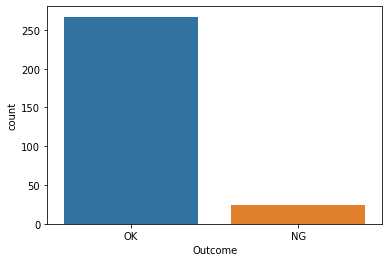

In [14]:
import seaborn as sns
sns.countplot(data['Outcome'],label="Count")

In [15]:
data['Outcome']=np.where(data['Outcome'] =='OK', 0, data['Outcome'])
data['Outcome']=np.where(data['Outcome'] =='NG', 1, data['Outcome'])
data['Outcome'] = data['Outcome'].astype('int') 
data.head(5)

,Outcome,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
168,0,0.062745,0.066667,0.062745,0.062745,0.062745,0.062745,0.066667,0.066667,0.066667,...,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,0.062745,0.062745,0.062745
144,0,0.050980,0.050980,0.050980,0.050980,0.054902,0.050980,0.050980,0.054902,0.054902,...,0.054902,0.050980,0.050980,0.050980,0.050980,0.054902,0.054902,0.050980,0.050980,0.050980
45,0,0.066667,0.066667,0.070588,0.066667,0.066667,0.066667,0.066667,0.066667,0.066667,...,0.070588,0.066667,0.066667,0.070588,0.070588,0.066667,0.066667,0.066667,0.062745,0.062745
11,0,0.066667,0.066667,0.066667,0.070588,0.070588,0.070588,0.070588,0.070588,0.070588,...,0.070588,0.070588,0.070588,0.070588,0.070588,0.066667,0.066667,0.062745,0.062745,0.062745
91,0,0.035294,0.035294,0.035294,0.039216,0.035294,0.035294,0.035294,0.035294,0.035294,...,0.035294,0.035294,0.035294,0.031373,0.031373,0.031373,0.031373,0.031373,0.027451,0.027451


In [16]:
X = data.loc[:, data.columns != 'Outcome']
y = data.loc[:, data.columns == 'Outcome']
y = y.astype('int') 

# 2. Over-sampling using SMOTE

In [17]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)

columns = X.columns
os_data_X,os_data_y=os.fit_sample(X, y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Outcome'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of OK images in oversampled data",len(os_data_y[os_data_y['Outcome']==0]))
print("Number of NG images in oversampled data",len(os_data_y[os_data_y['Outcome']==1]))
print("Proportion of OK data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==0])/len(os_data_X))
print("Proportion of NG data in oversampled data is ",len(os_data_y[os_data_y['Outcome']==1])/len(os_data_X))

length of oversampled data is  534
Number of OK images in oversampled data 267
Number of NG images in oversampled data 267
Proportion of OK data in oversampled data is  0.5
Proportion of NG data in oversampled data is  0.5


In [18]:
X=os_data_X
y=os_data_y['Outcome']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66, stratify=y)

# 3. Create an Artificial Neural Network with TensorFlow's Keras API

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [21]:
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print("Num GPUs Available:", len(physical_devices))

Num GPUs Available: 0


In [22]:
model = Sequential([
    Dense(units=16, input_shape=(len(X_train.columns),), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 13,170
Trainable params: 13,170
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train)

In [26]:
model.fit(x=X_train_scaled, y=y_train, batch_size=10, epochs=30, verbose=2)

Train on 357 samples
Epoch 1/30
357/357 - 1s - loss: 0.6927 - accuracy: 0.5378
Epoch 2/30
357/357 - 0s - loss: 0.6853 - accuracy: 0.5406
Epoch 3/30
357/357 - 0s - loss: 0.6764 - accuracy: 0.6779
Epoch 4/30
357/357 - 0s - loss: 0.6712 - accuracy: 0.6891
Epoch 5/30
357/357 - 0s - loss: 0.6675 - accuracy: 0.7115
Epoch 6/30
357/357 - 0s - loss: 0.6640 - accuracy: 0.6667
Epoch 7/30
357/357 - 0s - loss: 0.6611 - accuracy: 0.6919
Epoch 8/30
357/357 - 0s - loss: 0.6558 - accuracy: 0.6863
Epoch 9/30
357/357 - 0s - loss: 0.6514 - accuracy: 0.7087
Epoch 10/30
357/357 - 0s - loss: 0.6462 - accuracy: 0.7787
Epoch 11/30
357/357 - 0s - loss: 0.6417 - accuracy: 0.7227
Epoch 12/30
357/357 - 0s - loss: 0.6410 - accuracy: 0.7227
Epoch 13/30
357/357 - 0s - loss: 0.6335 - accuracy: 0.7255
Epoch 14/30
357/357 - 0s - loss: 0.6405 - accuracy: 0.6639
Epoch 15/30
357/357 - 0s - loss: 0.6360 - accuracy: 0.6975
Epoch 16/30
357/357 - 0s - loss: 0.6198 - accuracy: 0.7787
Epoch 17/30
357/357 - 0s - loss: 0.6170 - ac

# 4. Build a Validation Set With TensorFlow’s Keras API

In [27]:
model.fit(X_train_scaled, y=y_train, validation_split=0.1, batch_size=10, epochs=30, verbose=2)

Train on 321 samples, validate on 36 samples
Epoch 1/30
321/321 - 0s - loss: 0.5309 - accuracy: 0.8411 - val_loss: 0.5133 - val_accuracy: 0.8056
Epoch 2/30
321/321 - 0s - loss: 0.5422 - accuracy: 0.8006 - val_loss: 0.5382 - val_accuracy: 0.8056
Epoch 3/30
321/321 - 0s - loss: 0.5241 - accuracy: 0.8442 - val_loss: 0.4985 - val_accuracy: 0.9167
Epoch 4/30
321/321 - 0s - loss: 0.5085 - accuracy: 0.8349 - val_loss: 0.5329 - val_accuracy: 0.8333
Epoch 5/30
321/321 - 0s - loss: 0.5085 - accuracy: 0.8660 - val_loss: 0.4909 - val_accuracy: 0.9444
Epoch 6/30
321/321 - 0s - loss: 0.5011 - accuracy: 0.8692 - val_loss: 0.4770 - val_accuracy: 0.9444
Epoch 7/30
321/321 - 0s - loss: 0.4908 - accuracy: 0.8754 - val_loss: 0.4920 - val_accuracy: 0.8611
Epoch 8/30
321/321 - 0s - loss: 0.4845 - accuracy: 0.8660 - val_loss: 0.4599 - val_accuracy: 0.9444
Epoch 9/30
321/321 - 0s - loss: 0.4775 - accuracy: 0.8879 - val_loss: 0.4695 - val_accuracy: 0.8889
Epoch 10/30
321/321 - 0s - loss: 0.4728 - accuracy: 0.8

# 5. Neural Network Predictions With TensorFlow’s Keras API

In [28]:
X_test_scaled = scaler.fit_transform(X_test)

In [29]:
predictions = model.predict(x=X_test_scaled, batch_size=10, verbose=0)

In [30]:
for i in predictions:
    print(i)

[0.5579806  0.44201943]
[0.44300404 0.5569959 ]
[0.2991878 0.7008122]
[0.9129245  0.08707549]
[0.9240927 0.0759073]
[0.3623253 0.6376747]
[0.73583674 0.26416326]
[0.43868873 0.5613113 ]
[0.26568303 0.73431695]
[0.65481913 0.34518078]
[0.5582767  0.44172335]
[0.76690114 0.23309883]
[0.34342024 0.65657973]
[0.9626956  0.03730443]
[0.5277068 0.4722932]
[0.20242718 0.79757285]
[0.7787083  0.22129168]
[0.24790384 0.7520961 ]
[0.66537064 0.33462933]
[0.18125357 0.8187464 ]
[0.7590147  0.24098532]
[0.40636155 0.5936384 ]
[0.806223 0.193777]
[0.2608883 0.7391118]
[0.4528137  0.54718626]
[0.3035669 0.6964331]
[0.87524563 0.12475431]
[0.18672985 0.8132702 ]
[0.3196794  0.68032056]
[0.96719724 0.03280273]
[0.37172905 0.6282709 ]
[0.4810288  0.51897115]
[0.48959994 0.51040006]
[0.93439204 0.06560796]
[0.82070446 0.17929555]
[0.8004593  0.19954069]
[0.8932442  0.10675583]
[0.53601885 0.46398118]
[0.5042527  0.49574733]
[0.28094742 0.71905255]
[0.47360727 0.52639276]
[0.18269572 0.8173043 ]
[0.19336

In [31]:
rounded_predictions = np.argmax(predictions, axis=-1)

# 6. Create a Confusion Matrix for Neural Network Predictions

In [32]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [33]:
cm = confusion_matrix(y_true=y_test, y_pred=rounded_predictions)

In [34]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [35]:
cm_plot_labels = ['OK','NG']

Confusion matrix, without normalization
[[85  4]
 [14 74]]


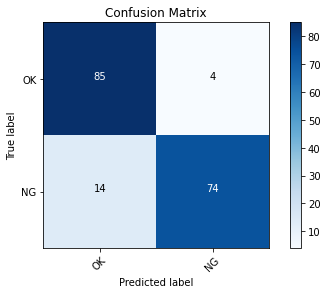

In [36]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# 7. Create a Classification Report for Neural Network Predictions

In [37]:
y_pred = rounded_predictions

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90        89
           1       0.95      0.84      0.89        88

    accuracy                           0.90       177
   macro avg       0.90      0.90      0.90       177
weighted avg       0.90      0.90      0.90       177



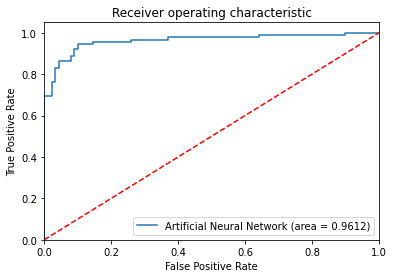

In [38]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
ann_roc_auc = roc_auc_score(y_test, model.predict(X_test_scaled)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Artificial Neural Network (area = %0.4f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('ANN_ROC')
plt.show()

In [39]:
import shutil
dir_path = 'C:\\Users\\רועי\\data\\NG-vs-OK\\DA1'
shutil.rmtree(dir_path)